# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

✅ The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [52]:
# see below

The *Car Claims* dataset, available on [Kaggle](https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection/data) and provided by **Angoss Knowledge Seeker**, contains 15,420 automobile insurance claims. Of these, 14,497 are legitimate and 923 are fraudulent**, reflecting a significant class imbalance.

#### **Who (Audience)**
- **Fraud Investigators & Analysts:** Improve fraud detection models.  
- **Claims Adjusters & Underwriters:** Assess claim validity.  
- **Insurance Executives & Risk Managers:** Reduce fraud losses.  

#### **What (Key Message)**
- **Fraud is rare (6%) but costly.**  
- **Patterns exist** in claim amount, number of vehicles, and incident type.  
- **Better detection models** can minimize losses while ensuring fair claims.  

#### **How (Visualization Approach)**
- **Bar charts**: Fraud vs. non-fraud distribution.  
- **Heatmaps**: Feature correlations.  
- **Decision Trees**: Key fraud indicators.  
- **Time trends**: Fraud patterns over time.  
- **Geospatial maps**: Fraud hotspots.  

# 3. Homework - work with your own data

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- ✅  Summarize the datasets using info() and describe()

- ✅ Are there any duplicate rows?

- ✅ Are there any duplicate values in a given column (when this would be inappropriate?)

- ✅ What are the mean, median, and mode of each column?

- ✅ Are there any missing or null values?

    - ✅ Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- ✅ Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- ✅ Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- ✅ Are the data usable?  If not, find some new data!

- ✅ Do you need to modify or correct the data in some way?

- ✅ Is there any class imbalance?  (Categories that have many more items than other categories).

In [54]:
# set variables
kaggle_dataset_path = "khusheekapoor/vehicle-insurance-fraud-detection"
kaggle_dataset_file_name = "carclaims.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.copy()

# show top rows
dataset.head()

Path to kaggle dataset: khusheekapoor/vehicle-insurance-fraud-detection
Kaggle dataset file name: carclaims.csv
Path to downloaded file: /home/codespace/.cache/kagglehub/datasets/khusheekapoor/vehicle-insurance-fraud-detection/versions/1


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [55]:
# Summarize the datasets using info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [56]:
# add target feature as integer
dataset['FraudFound_Int'] = dataset['FraudFound'].map({'Yes': 1, 'No': 0})

In [57]:
# Summarize the datasets using describe()
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0
FraudFound_Int,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0


In [58]:
# Are there any duplicate rows?
# Note: There is no information describing primary key, therefore first duplicates check for all of the columns:
print("Number of duplicated Rows: ", dataset.duplicated().sum())

# show duplicated if any:
if  dataset.duplicated().sum() > 0:
    dataset_duplicates = dataset[dataset.duplicated()]
    print("Duplicated Rows: ", dataset_duplicates)
    # clean up from duplicates
    deleted_duplicates = dataset.drop_duplicates()
    print("Deleted Duplicated Rows:", dataset_duplicates)
    
else:
    print("No duplicates found.")

Number of duplicated Rows:  0
No duplicates found.


In [59]:
# add some very basic data profiling:
# shape 
print(f"This dataset contain {dataset.shape[0]} rows")
print(f"This dataset contain {dataset.shape[1]} columns")

# basic aggregates
data_profiling = dataset.agg(['count', 'nunique', 'min', 'max']).transpose()
data_profiling

This dataset contain 15420 rows
This dataset contain 34 columns


,count,nunique,min,max
Month,15420,12,Apr,Sep
WeekOfMonth,15420,5,1,5
DayOfWeek,15420,7,Friday,Wednesday
Make,15420,19,Accura,VW
AccidentArea,15420,2,Rural,Urban
DayOfWeekClaimed,15420,8,0,Wednesday
MonthClaimed,15420,13,0,Sep
WeekOfMonthClaimed,15420,5,1,5
Sex,15420,2,Female,Male
MaritalStatus,15420,4,Divorced,Widow


In [60]:
# get list of columns where 'count' is equal to 'nunique', these are our natural key candidates:
data_profiling_unique_columns = data_profiling[data_profiling['count'] == data_profiling['nunique']]
data_profiling_unique_columns

,count,nunique,min,max
PolicyNumber,15420,15420,1,15420


In [61]:
# Assume the data must have a unique ID, such as PolicyNumber  
# This is how duplicates can be detected  
print(f"Duplicates of Policy Numbers: {dataset['PolicyNumber'].duplicated().sum()}")

# and deleted
dataset_with_unique_policy_numbers = dataset.drop_duplicates(subset=['PolicyNumber'], keep='last')
dataset_with_unique_policy_numbers.head()

Duplicates of Policy Numbers: 0


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,FraudFound_Int
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,No,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,0


#### *Are there any duplicate values in a given column (when this would be inappropriate?)*

##### Inapropriate duplicates could be : 
- Primary or natural keys: Unique identifiers such as a claim number(if provided), or a composite key formed by combining multiple columns (e.g., `PolicyNumber` + `Timestamp`).
- Timestamps: Expected to be unique per claim, but collisions may occur.

##### Apropriate duplicates are : 
- Categorical attributes: Examples include `Month`, `Sex`, `Marital Status`, etc.
- Numerical values: Examples include `Deductible Amount`, etc.

In [62]:
# What are the mean, median, and mode of each column?
# select only numeric columns
numeric_dataset = dataset.select_dtypes(include=['number'])

# compute mean, median, and mode only for numeric columns
summary_stats = numeric_dataset.agg(['mean', 'median']).transpose()

# compute mode separately
mode_values = numeric_dataset.mode().iloc[0]  # First mode for each column
summary_stats['mode'] = mode_values
print("Mean, median, and mode:")
summary_stats

Mean, median, and mode:


,mean,median,mode
WeekOfMonth,2.788586,3.0,3.0
WeekOfMonthClaimed,2.693969,3.0,2.0
Age,39.855707,38.0,30.0
PolicyNumber,7710.500000,7710.5,1.0
RepNumber,8.483268,8.0,7.0
Deductible,407.704280,400.0,400.0
DriverRating,2.487808,2.0,1.0
Year,1994.866472,1995.0,1994.0
FraudFound_Int,0.059857,0.0,0.0


In [63]:
# Are there any null values?

# check null Values
missing_values_number = dataset.isnull().sum().sum()
if missing_values_number > 0:
    print(f"This dataframe contain null values = {missing_values_number}")
else:
    print("No null values detected.")

No null values detected.


#### *Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?*
- **Few missing values or rows**:  Remove the rows.  
- **Significant percentage of missing values**:  
  - **Numerical columns**: Fill with the mean.  
  - **Categorical columns**: Fill with "Unknown" and encode.

#### *Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)*

Based on the `data_profiling` dataframe: 
 - Column `MonthClaimed` should contain valid month names (e.g., Jan, Feb, ..., Dec), but some rows have a value of 0, which is an inconsistency.
 - The column `Age` contains values of 0, which may indicate inconsistencies or errors.
 - The column `DayOfWeekClaimed` has 8 distinct values, which may indicate inconsistencies or errors, as there should only be 7 possible values (Monday to Sunday).
 - There are duplicated features like `AgeOfPolicyHolder` (categorical age range)  and `Age` (exact age). 


#### *Encode any categorical variables (e.g. with one-hot encoding.)*


In [64]:
# One-hot encode categorical columns
dataset_encoded = pd.get_dummies(dataset, columns=['Month', 'Make'])
dataset_encoded.head()

,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,...,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW
0,5,Wednesday,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,...,False,False,False,False,False,False,False,False,False,False
1,3,Wednesday,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,...,False,False,False,False,False,False,False,False,False,False
2,5,Friday,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,...,False,False,False,False,False,False,False,False,False,False
3,2,Saturday,Rural,Friday,Jul,1,Male,Married,65,Third Party,...,False,False,False,False,False,False,False,False,True,False
4,5,Monday,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,...,False,False,False,False,False,False,False,False,False,False


### Conclusions:

- *Are the data usable?  If not, find some new data!*
  - The data appears usable, with minor inconsistencies.

- *Do you need to modify or correct the data in some way?*
  - There are some inconsistencies that can be fixed:
    - `MonthClaimed`: Rows with 0 values can be removed.
    - `Age`: This feature can be dropped, or 0 values can be replaced with the median age from the corresponding `AgeOfPolicyHolder` (categorical age range).
    - `DayOfWeekClaimed`: Rows with 0 values can be removed.

- *Is there any class imbalance?  (Categories that have many more items than other categories).*
  - Most categorical columns have fewer than 10 unique values, while `Age` has 64 distinct categories.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. 
- ✅ Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  
- ✅ If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

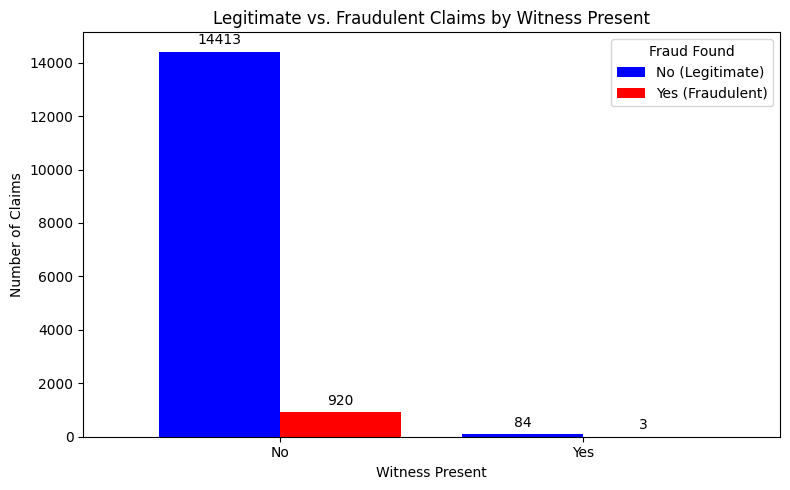

In [78]:
df = dataset.copy()

fraud_counts = df.groupby(["WitnessPresent", "FraudFound"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 5))

# plot the bars side by side (stacked=False for grouped bars)
bars = fraud_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'], width=0.8)

# adjusting labels on bars to prevent overlapping
for bar_container in bars.containers:
    ax.bar_label(bar_container, fmt='%d', padding=3, fontsize=10)

# add labels and title
ax.set_xlabel("Witness Present")
ax.set_ylabel("Number of Claims")
ax.set_title("Legitimate vs. Fraudulent Claims by Witness Present")
ax.legend(title="Fraud Found", labels=["No (Legitimate)", "Yes (Fraudulent)"])

# adjust tick rotation and layout
plt.xticks(rotation=0)
plt.tight_layout()

# show the chart
plt.show()

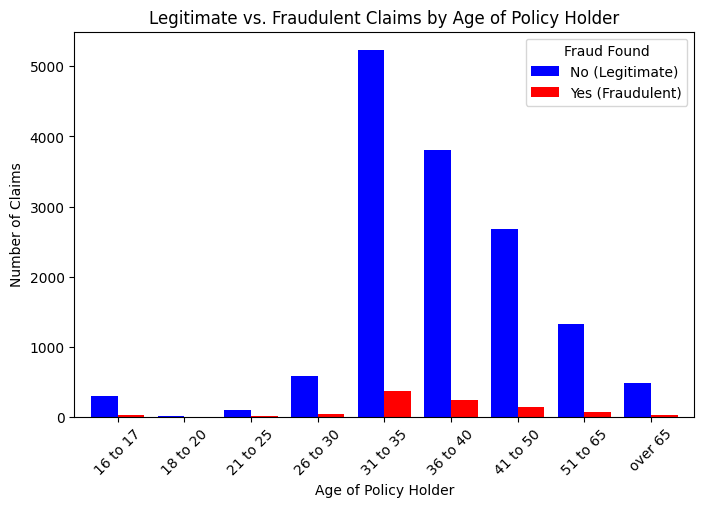

In [79]:
fraud_counts = df.groupby(["AgeOfPolicyHolder", "FraudFound"]).size().unstack(fill_value=0)

# Plot grouped bar chart (bars next to each other)
fig, ax = plt.subplots(figsize=(8, 5))
fraud_counts.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'], width=0.8)

# add labels and title
ax.set_xlabel("Age of Policy Holder")
ax.set_ylabel("Number of Claims")
ax.set_title("Legitimate vs. Fraudulent Claims by Age of Policy Holder")
ax.legend(title="Fraud Found", labels=["No (Legitimate)", "Yes (Fraudulent)"])

# show the chart
plt.xticks(rotation=45)
plt.show()

#### *Write down what you tried or what Google searches you did to find the answers.*
I've tried multiple combinations of categorical features, aiming to keep the chart readable while avoiding unnecessary complexity. 

I prefer bar charts as they are the easiest to read and interpret. I also searched on Google and found other projects on Kaggle with this dataset, but most of them focus on machine learning rather than descriptive analytics.

Additionally, I added a heatmap below to visualize correlations and identify patterns in the data.

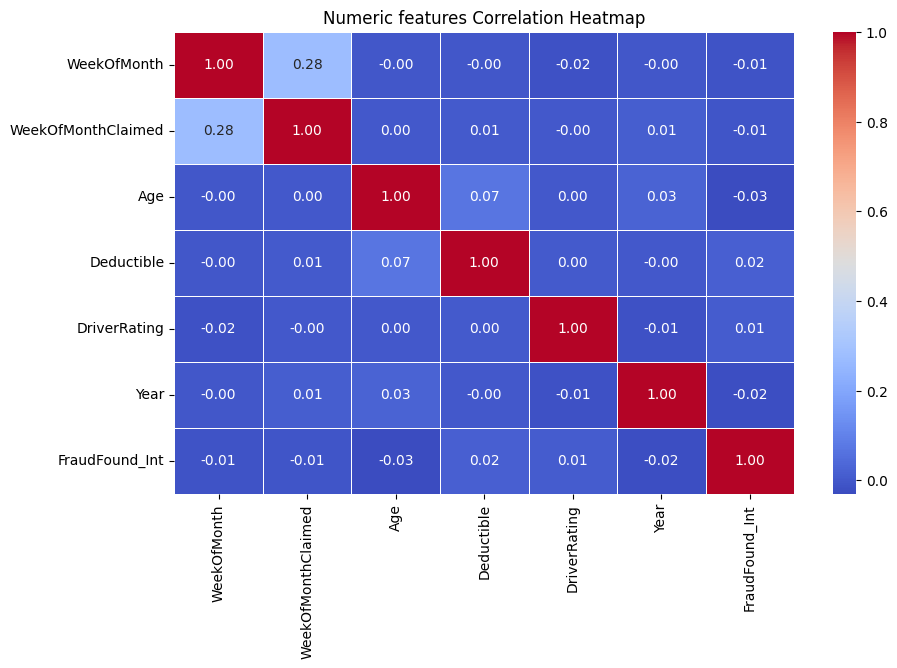

In [ ]:
# Feature Correlation Heatmap
# use only numeric features for the heat map
# do not use `PolicyNumber` and `RepNumber`, leaving them for the numerologists.
df_numeric = dataset.select_dtypes(include=['number']).drop(columns=['PolicyNumber', 'RepNumber'])

# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# add title
plt.title("Numeric features Correlation Heatmap")

# show the heatmap
plt.show()

#### Heatmap observations
The heatmap suggests that no strong correlations exist among the **numeric** features, meaning each variable is relatively independent.

More feature engineering is needed, such as encoding categorical variables or creating new derived features to improve model performance.
